In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CS102/Case-Study-Final

/content/drive/MyDrive/CS102/Case-Study-Final


In [ ]:
%ls

 FastFoodNutritionMenuV3.csv             mobile_usage_behavioral_analysis.csv
'Global Ecological Footprint 2023.csv'   Sleep_health_and_lifestyle_dataset.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('mobile_usage_behavioral_analysis.csv')

print(df.info())
print(df.head())

print(f'Null Values\n{df.isnull().sum()}')
print(f'Duplicated Values\n{df.duplicated().sum()}')

print(df.describe())

df.columns = df.columns.str.strip().str.capitalize().str.replace(' ', '_')


df['Usage_sum_check'] = (
    df['Social_media_usage_hours'] +
    df['Productivity_app_usage_hours'] +
    df['Gaming_app_usage_hours']
)
df.rename(columns={'Total_app_usage_hours':'Total_mobile_app_usage_hours'}, inplace = True)

df['Discrepancies'] = df['Total_mobile_app_usage_hours'] != df['Usage_sum_check']

df['Total_mobile_app_usage_hours'] = df.apply(lambda row: row['Usage_sum_check'] if row['Discrepancies'] == True else row['Total_mobile_app_usage_hours'], axis=1)

df['Discrepancies_in_total_screen_time'] = df['Total_mobile_app_usage_hours'] >= df['Daily_screen_time_hours']

df['Daily_screen_time_hours'] = df.apply(lambda row: row['Total_mobile_app_usage_hours'] if row['Discrepancies_in_total_screen_time'] == True else row['Daily_screen_time_hours'], axis=1)

df['Other_act_in_using_mobile'] = df['Daily_screen_time_hours']-df['Total_mobile_app_usage_hours']

df['Age_group'] = df.apply(lambda row: row['Total_mobile_app_usage_hours'] if row['Discrepancies_in_total_screen_time'] == True else row['Daily_screen_time_hours'], axis=1)

df['Age_group'] = df['Age'].apply(lambda age:
    'Teens/Adolescents' if 13 <= age <= 19 else
    'Young Adults' if 20 <= age <= 34 else
    'Adults' if 35 <= age <= 49 else
    'Middle-aged Adults' if 50 <= age <= 64 else
    'Seniors/Elderly' if age >= 65 else
    'Children')
df_rmv_col = df.drop(['Discrepancies', 'Discrepancies_in_total_screen_time','Usage_sum_check'], axis=1)


print(df_rmv_col.head())
print(df_rmv_col.describe())
print(df_rmv_col.shape)

df_rmv_col.to_csv('Cleaned_user_engagement_and_app_usage_patterns.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.2+ KB
None
   User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0        1   56    Male                   2

<ipython-input-25-25c4f6eaa48f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


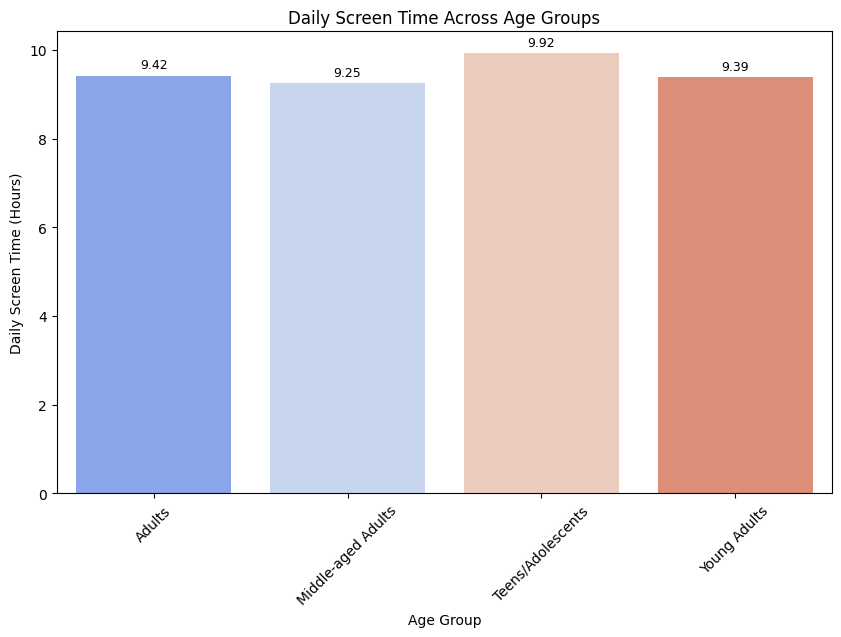

In [ ]:
age_group_summary = df_rmv_col.groupby('Age_group', as_index=False)['Daily_screen_time_hours'].mean()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Age_group',
    y='Daily_screen_time_hours',
    data=age_group_summary,
    palette='coolwarm',
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)
plt.title('Daily Screen Time Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Daily Screen Time (Hours)')
plt.xticks(rotation=45)

plt.show()

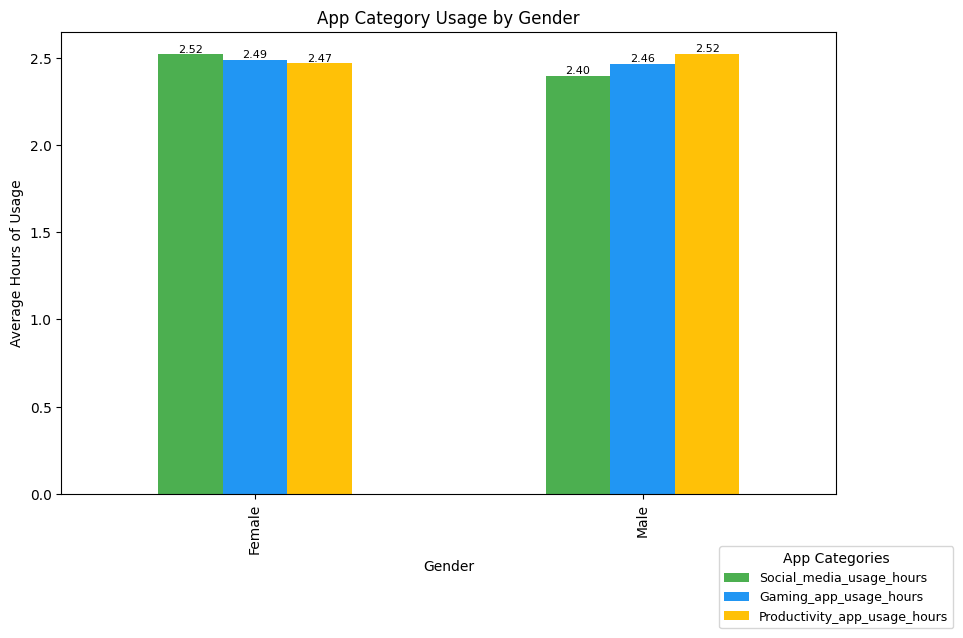

In [ ]:
category_usage_gender = df_rmv_col.groupby('Gender')[['Social_media_usage_hours', 'Gaming_app_usage_hours', 'Productivity_app_usage_hours']].mean()
ax = category_usage_gender.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#4CAF50', '#2196F3', '#FFC107'])

plt.title('App Category Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Hours of Usage')
plt.legend(title="App Categories", bbox_to_anchor=(1, -0.1), fontsize=9, loc='upper center')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8)

plt.show()

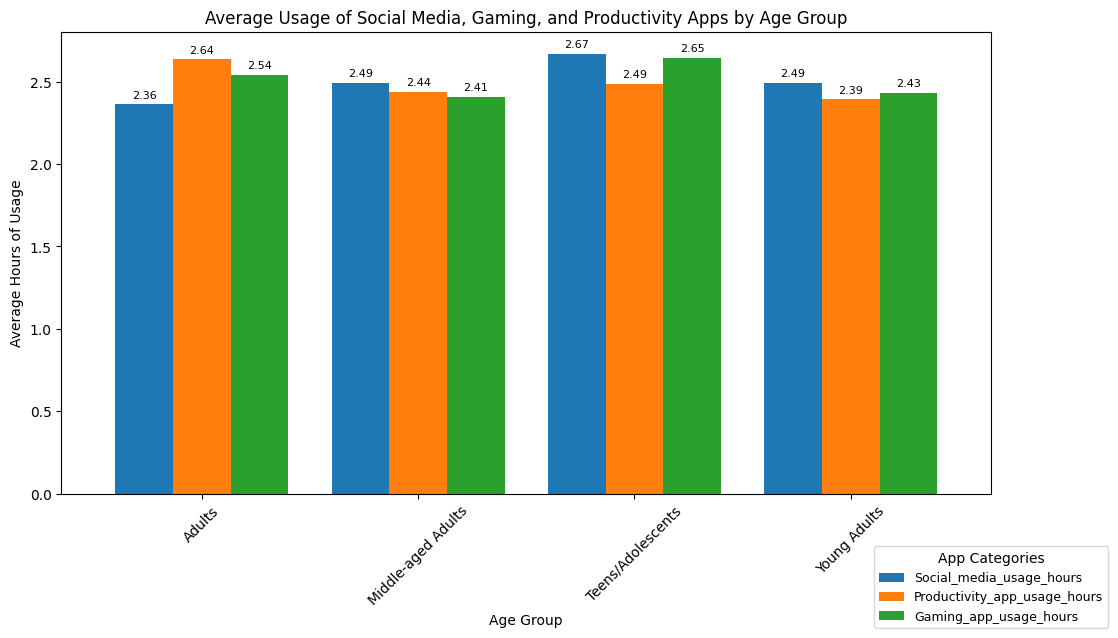

In [ ]:
usage_columns = ['Social_media_usage_hours', 'Productivity_app_usage_hours', 'Gaming_app_usage_hours']
age_group_usage = df_rmv_col.groupby('Age_group')[usage_columns].mean()
ax = age_group_usage.plot(kind='bar', width=0.8, figsize=(12, 6))
plt.title('Average Usage of Social Media, Gaming, and Productivity Apps by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours of Usage')
plt.xticks(rotation=45)
plt.legend(title="App Categories", fontsize=9, loc='upper center', bbox_to_anchor=(1, -0.1))

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8, padding=3)

plt.show()

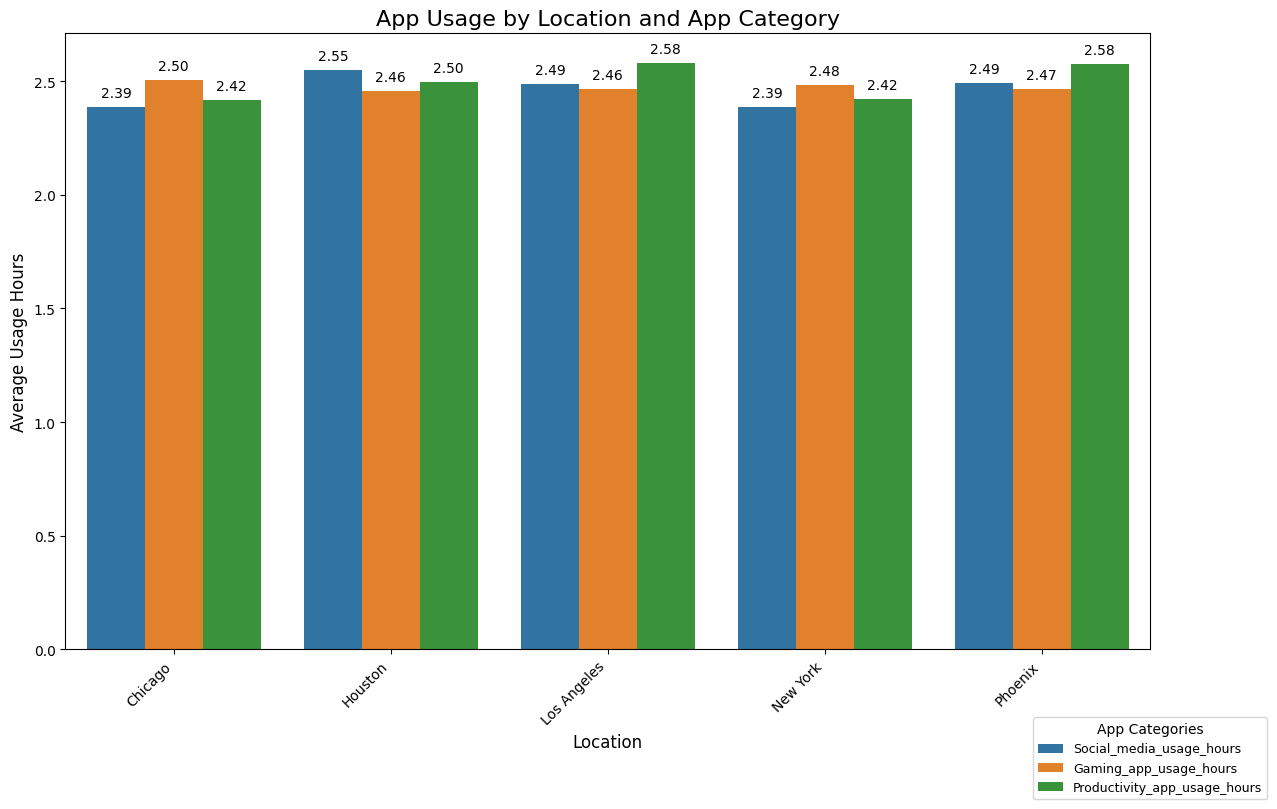

In [ ]:
location_app_usage = df.groupby('Location')[['Social_media_usage_hours', 'Gaming_app_usage_hours', 'Productivity_app_usage_hours']].mean().reset_index()
location_app_usage_melted = location_app_usage.melt(id_vars='Location',
                                                   value_vars=['Social_media_usage_hours', 'Gaming_app_usage_hours', 'Productivity_app_usage_hours'],
                                                   var_name='App Category',
                                                   value_name='Average Usage Hours')

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Location', y='Average Usage Hours', hue='App Category', data=location_app_usage_melted)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=5)
plt.title('App Usage by Location and App Category', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Usage Hours', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='App Categories', fontsize=9, bbox_to_anchor=(1, -0.1),loc='upper center')

plt.show()